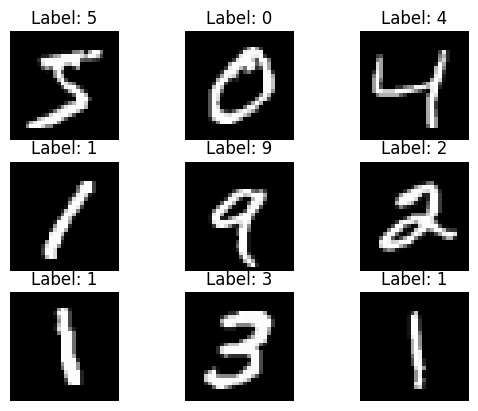

In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y.iloc[i]}")
    plt.axis('off')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_clf = SVC(kernel='rbf', gamma='scale', C=1)
svm_clf.fit(X_train, y_train)


y_pred = svm_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Accuracy: 0.98


In [6]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1329    1    3    0    1    2    2    1    4    0]
 [   0 1585    4    3    2    0    0    4    2    0]
 [   3    4 1348    2    3    2    4    8    5    1]
 [   0    2   11 1386    2   11    1    9    7    4]
 [   1    0    2    0 1269    0    3    2    2   16]
 [   0    1    2   15    2 1236    9    1    7    0]
 [   1    0    0    0    4    4 1384    0    3    0]
 [   1    6   12    1    5    1    0 1465    1   11]
 [   2    6    8   12    4    9    6    4 1303    3]
 [   5    8    2    8   14    2    0   11    5 1365]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99   

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

cnn_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train.reshape(-1, 28, 28), y_train.astype(int), epochs=10, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8596 - loss: 0.4783 - val_accuracy: 0.9443 - val_loss: 0.1750
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9632 - loss: 0.1176 - val_accuracy: 0.9683 - val_loss: 0.1045
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9774 - loss: 0.0757 - val_accuracy: 0.9708 - val_loss: 0.0939
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9819 - loss: 0.0563 - val_accuracy: 0.9707 - val_loss: 0.1028
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9884 - loss: 0.0393 - val_accuracy: 0.9712 - val_loss: 0.0991
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9906 - loss: 0.0311 - val_accuracy: 0.9715 - val_loss: 0.1013
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9917 - loss: 0.0256 - val_accuracy: 0.9711 - val_loss: 0.1111
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9936 - loss: 0.0191 -

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [11]:
import joblib

joblib.dump(svm_clf, 'svm_mnist_model.pkl')

loaded_model = joblib.load('svm_mnist_model.pkl')
